In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.drop('target',axis=1)
y = df['target']

In [4]:
#choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
#make a prediction
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [8]:
#evaluate the model
clf.score(x_train,y_train)

1.0

In [9]:
clf.score(x_test,y_test)

0.8524590163934426

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [12]:
##improve a model

np.random.seed(42)

for i in range(10,100,10):
  print(f'Trying the model with {i} estimators....')
  clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
  print(f'Model accuracy on test set: {clf.score(x_test,y_test) *100:.2f}%')
  print('')

Trying the model with 10 estimators....
Model accuracy on test set: 85.25%

Trying the model with 20 estimators....
Model accuracy on test set: 80.33%

Trying the model with 30 estimators....
Model accuracy on test set: 83.61%

Trying the model with 40 estimators....
Model accuracy on test set: 80.33%

Trying the model with 50 estimators....
Model accuracy on test set: 86.89%

Trying the model with 60 estimators....
Model accuracy on test set: 83.61%

Trying the model with 70 estimators....
Model accuracy on test set: 83.61%

Trying the model with 80 estimators....
Model accuracy on test set: 83.61%

Trying the model with 90 estimators....
Model accuracy on test set: 81.97%



In [13]:
#save a model and laod it

import pickle

pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [14]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(x_test,y_test)

0.819672131147541

In [15]:
car_sales = pd.read_csv('car-sales-extended.csv')

In [16]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [17]:
x = car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [20]:
#alternative
dummies = pd.get_dummies(car_sales[['Doors','Make','Colour']],drop_first=False)

In [21]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [23]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
model.score(x_test,y_test)

0.29444524256551574

In [25]:
#missing values


In [26]:
car_missed = pd.read_csv('car-sales-extended-missing-data.csv')

In [27]:
car_missed.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
car_missed.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
car_missed.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
x = car_missed.drop('Price',axis=1)
y = car_missed['Price']

In [31]:
car_missed['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [32]:
##### filling missing data with pandas
car_missed['Make'].fillna('missing',inplace=True)

car_missed['Colour'].fillna('missing',inplace=True)

car_missed['Odometer (KM)'].fillna(car_missed['Odometer (KM)'].mean(),inplace=True)

car_missed['Doors'].fillna(4,inplace=True)

In [33]:
car_missed.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
#removing rows with the missing Price value
car_missed.dropna(inplace=True)

In [35]:
car_missed.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
x = car_missed.drop('Price',axis=1)
y = car_missed['Price']

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')
transformed_x = transformer.fit_transform(car_missed)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [38]:
##filling missing values with sklearn
car_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [39]:
car_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
car_missing.dropna(subset=['Price'],inplace=True)
car_missing.isnull().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
x = car_missing.drop('Price',axis=1)
y = car_missing['Price']

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [43]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [44]:
#categorical
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')

#using for door
door_imputer = SimpleImputer(strategy='constant',fill_value=4)

#numerical imputer
num_imputer = SimpleImputer(strategy='mean')

#define columns
cat_feature = ['Make','Colour']
door_feat = ['Doors']
num_feat = ['Odometer (KM)']

#cerate an imputer (something that fills missing data)
imputer = ColumnTransformer([
                             ('cat_feature',cat_imputer,cat_feature),
                             ('door_feat',door_imputer,door_feat),
                             ('num_feat',num_imputer,num_feat)]
                            )

#transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [45]:
car_sales_filled = pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [46]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [48]:
#lets fit a model
from sklearn.ensemble import RandomForestRegressor

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [49]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3859660820618287

In [50]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [51]:
#importing boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [52]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [54]:
len(boston_df)

506

In [55]:
from sklearn.linear_model import Ridge

#set up random seed
np.random.seed(42)

#create the data
x = boston_df.drop('target',axis=1)
y = boston_df['target']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Ridge()

model.fit(x_train,y_train)

#evaluate the model on the test data
model.score(x_test,y_test)

0.6662221670168522

#how do we improve the score
#or what about if ridge regression not working

In [56]:
from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop('target',axis=1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

#evaluate the model on the test data
model.score(x_test,y_test)

0.9173271673630029

In [57]:
y_pred = model.predict(x_test)

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1.8312843137254902

##choosing an estimator for the classification problem

In [59]:
heart_disease = pd.read_csv('heart-disease.csv')

In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_disease)

303

In [62]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = LinearSVC()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7049180327868853

In [63]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [65]:
np.random.seed(42)
for i in range(10,100,5):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(x_train,y_train)

  print(f'The model accuracy for estimator {i} at test set is : {clf.score(x_test,y_test)}')

The model accuracy for estimator 10 at test set is : 0.8524590163934426
The model accuracy for estimator 15 at test set is : 0.8360655737704918
The model accuracy for estimator 20 at test set is : 0.8852459016393442
The model accuracy for estimator 25 at test set is : 0.8524590163934426
The model accuracy for estimator 30 at test set is : 0.819672131147541
The model accuracy for estimator 35 at test set is : 0.8524590163934426
The model accuracy for estimator 40 at test set is : 0.8032786885245902
The model accuracy for estimator 45 at test set is : 0.8524590163934426
The model accuracy for estimator 50 at test set is : 0.8360655737704918
The model accuracy for estimator 55 at test set is : 0.8524590163934426
The model accuracy for estimator 60 at test set is : 0.8360655737704918
The model accuracy for estimator 65 at test set is : 0.8360655737704918
The model accuracy for estimator 70 at test set is : 0.8524590163934426
The model accuracy for estimator 75 at test set is : 0.8360655737

In [66]:
y_pred = clf.predict(x_test)

In [67]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [68]:
np.mean(y_pred == y_test)

0.8688524590163934

In [69]:
clf.score(x_test,y_test)

0.8688524590163934

In [70]:
accuracy_score(y_test,y_pred)

0.8688524590163934

##making prediction with predict proba

In [71]:
clf.predict_proba(x_test[:5])

array([[0.82105263, 0.17894737],
       [0.34736842, 0.65263158],
       [0.44210526, 0.55789474],
       [0.88421053, 0.11578947],
       [0.21052632, 0.78947368]])

In [72]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

##evaluating the model using scoring parameter

In [73]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [74]:
cross_val_score(clf,x,y)

array([0.81967213, 0.8852459 , 0.78688525, 0.85      , 0.8       ])

In [75]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(x_test,y_test)

#take the mean of 5-val score
clf_corss_val_score = np.mean(cross_val_score(clf,x,y))

# now compare both
clf_single_score, clf_corss_val_score

(0.8524590163934426, 0.8248087431693989)

##area under the receiver operating characteristic curve (AUC/ROC)

In [76]:
from sklearn.metrics import roc_curve

#making predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.93, 0.07],
       [0.39, 0.61],
       [0.47, 0.53],
       [0.91, 0.09],
       [0.22, 0.78],
       [0.17, 0.83],
       [0.25, 0.75],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.51, 0.49]])

In [77]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.07, 0.61, 0.53, 0.09, 0.78, 0.83, 0.75, 0.02, 0.01, 0.49])

In [78]:
#calculate fpr, tpr, and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.31034483,
       0.31034483, 0.34482759, 0.48275862, 0.51724138, 0.5862069 ,
       0.68965517, 0.68965517, 0.86206897, 0.96551724, 1.        ])

In [79]:
#create a function for plotting ROC curves
import matplotlib.pyplot as plt


In [80]:
def plot_curve(fpr, tpr):
  '''
  plot a roc curve given the false positive rate (fpr) 
  and true postive rate (tpr) of a model.
  '''
  plt.plot(fpr,tpr,color='orange', label= 'ROC')
  
  #plot line with no predictive power
  plt.plot([0,1], [0,1], color='darkblue',linestyle='--', label='guessing') # adding the line of ----- 

  #customize the plot
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('Receiver operating characteristic (ROC) curve')
  plt.legend()
  plt.show()

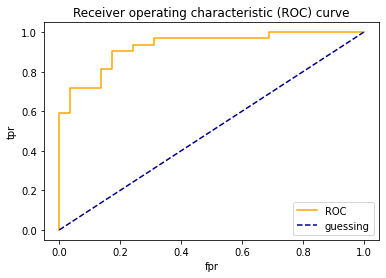

In [81]:
plot_curve(fpr,tpr)

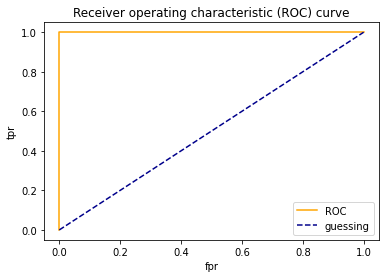

In [82]:
#plot perfect roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_curve(fpr,tpr)

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.927801724137931

In [84]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[24,  4],
       [ 5, 28]])

In [85]:
#visualise the confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_pred,
            rownames=['Actual labels'],
            colnames=['predicted labels'])

predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


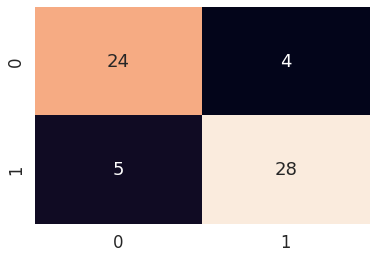

In [86]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_pred,y_test)

sns.heatmap(conf_mat,annot=True,cbar=False);

##regression R^2 score

In [87]:
from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop('target',axis=1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean()) # full mean all rows

In [89]:
y_test.mean()

21.488235294117654

In [90]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [91]:
r2_score(y_test, y_test_mean) # aroun 0 means values are caluclating near to mean and -ve means poor predictions and + means very good model

2.220446049250313e-16

In [92]:
r2_score(y_test,y_test)

1.0

## mae 

In [93]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mae

0.8816862745097996

In [94]:
df = pd.DataFrame(data={'actual value':y_test,
                        'predicted value': y_pred})
df['differences'] = df['actual value'] - df['predicted value']
df

,actual value,predicted value,differences
173,23.6,23.232,0.368
274,32.4,31.898,0.502
491,13.6,14.019,-0.419
72,22.8,22.856,-0.056
452,16.1,16.348,-0.248
...,...,...,...
412,17.9,16.899,1.001
436,9.6,10.570,-0.970
411,17.2,17.243,-0.043
86,22.5,20.943,1.557


##classification

In [95]:
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier()

In [96]:
np.random.seed(42)

cv_acc = cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [97]:
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [98]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [99]:
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
print(f'The cross-validated accuracy is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated accuracy is: 83.30%


In [100]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
print(f'The cross-validated accuracy is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated accuracy is: 85.45%


In [101]:
#cv_f1
#recall
np.random.seed(42)
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
print(f'The cross-validated accuracy is: {np.mean(cv_f1)*100:.2f}%')

The cross-validated accuracy is: 84.27%


#for regression

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target',axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [103]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=6,scoring=None)
np.mean(cv_r2)

0.6574163110769438

In [104]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=6,scoring='r2')
np.mean(cv_r2)

0.6574163110769438

In [105]:
np.random.seed(42)
cv_mae = cross_val_score(model,x,y,cv=6,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-3.02129887955182

In [106]:
np.random.seed(42)
cv_mse = cross_val_score(model,x,y,cv=6,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-22.044985069514464

##metric functions

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(f'accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')

print(f'precision: {precision_score(y_test,y_pred)*100:.2f}%')
print(f'recall: {recall_score(y_test,y_pred)*100:.2f}%')

print(f'f1: {f1_score(y_test,y_pred)*100:.2f}%')

accuracy: 85.25%
precision: 84.85%
recall: 87.50%
f1: 86.15%


In [108]:
##gettuinf a parameter in classifier o0r regressor
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [109]:
from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop('target',axis=1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor()

model.fit(x_train,y_train)

#evaluate the model on the test data
model.score(x_test,y_test)

y_pred = model.predict(x_test)

## Tuning hyperparameters

we're trying 
'max_depth'
'max_features'
'min_samples_leaf'
'min_samples_split'
'n_estimators'


In [110]:
def evaluate_preds(y_true,y_pred):

  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  f1 = f1_score(y_true,y_pred)

  metric_dict = {'accuracy':round(accuracy,2),
                 'precision':round(precision,2),
                 'recall': round(recall,2),
                 'f1':round(f1,2)}
  print(f'acc : {accuracy * 100:.2f}%')
  print(f'precision : {precision * 100:.2f}%')
  print(f'recall : {recall * 100:.2f}%')
  print(f'f1 : {f1 * 100:.2f}%')

  return metric_dict

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 + len(heart_disease_shuffled))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split] 
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#make the baseline predictions
y_pred = clf.predict(x_valid)

#evaluare the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_pred)

acc : 81.32%
precision : 82.35%
recall : 84.00%
f1 : 83.17%


In [113]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## hyperparameter tuning with RandomizedSearchCV

In [114]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

#splitting in to x, y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split in to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#initiate the randomforestclassifer
clf = RandomForestClassifier(n_jobs=1)

#setup randomized searchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.8s finished


In [115]:
rs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [116]:
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

acc : 80.33%
precision : 76.67%
recall : 82.14%
f1 : 79.31%


## hyperparameter tuning with GridSearchCV

In [117]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [118]:
# in Gridsearch it will take all parameters 5*2*3*3*6

In [119]:
grid_2 = {'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2],
          'min_samples_split': [6],
          'n_estimators': [100, 200, 500]}

In [120]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

#splitting in to x, y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split in to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#initiate the randomforestclassifer
clf = RandomForestClassifier(n_jobs=1)

#setup Gridsearchcv
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,verbose=2)

gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   21.3s finished


In [121]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [122]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate the metrics
gs_metrics = evaluate_preds(y_test,gs_y_preds)

acc : 81.97%
precision : 77.42%
recall : 85.71%
f1 : 81.36%


##using Pipeline

In [123]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

##modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#set up the randoms seed
import numpy as np

np.random.seed(42)

# import data and drop rows with missing-labels

df = pd.read_csv('car-sales-extended-missing-data.csv')
df.dropna(subset=['Price'], inplace=True)

#define differernt features and transformer Pipeline
categorical_features = ['Make', 'Colour']

categorical_transformer = Pipeline(steps=[
                                          ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                          ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
                                  ('imputer',SimpleImputer(strategy='constant',fill_value=4))])

numerical_features= ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
                                      ('imputer',SimpleImputer(strategy='mean'))])

#setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                    transformers =[
                                   ('cat',categorical_transformer, categorical_features),
                                   ('door',door_transformer,door_feature),
                                   ('num',numeric_transformer,numerical_features)])

#create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',RandomForestRegressor())])

#split the data
x = df.drop('Price',axis=1)
y = df['Price']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [124]:
#use gridsearchcv or rscv with our pipeline

pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features': ['auto'],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model, pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [125]:
gs_model.score(x_test,y_test)

0.3339554263158365

classification task

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    207
0     96
Name: sex, dtype: int64